## Med Data warehouse

### Training Yolo11 model on custom Med Data
- <a href="https://colab.research.google.com/github/Yosef-ft/MedData_Warehouse/blob/main/notebooks/YOLO_Custom_model.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a> 

### Installing necessary libraries

In [4]:
!pip install roboflow
!pip install ultralytics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing necessary libraries

In [1]:
from ultralytics import YOLO
import os
import pandas as pd
import glob
from IPython.display import Image, display
from IPython import display
display.clear_output()
!yolo mode=checks

#### Train YOLOV11 using custom dataset

In [6]:
# Downloading the custom dataset that has been annotate from Roboflow
API_KEY = os.getenv('RF_API_KEY')

from roboflow import Roboflow
rf = Roboflow(api_key=API_KEY)
project = rf.workspace("meddata").project("meddata-identifier")
version = project.version(1)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to MedData-Identifier-1 in yolov11:: 100%|██████████| 494/494 [00:00<00:00, 7496.01it/s]


**Note**
  - The custom data consists of:
    - 169 training images
    - 48 validation sets
    - 24 test sets
  - The class names for the dataset are:
    - cosmetics:            65 in number
    - Diapers:              2 in number
    - Food_packages:        26 in number
    - Lotion_Moisturizers:  17 in number
    - Medicines:            25 in number
    - Milk_formula:         37 in number
    - Mini_drops:           13 in number
    - Pregnancy:            6 in number
    - Supplement:           71 in number

#### Training to our custom dataset

In [4]:
!yolo task=detect mode=train model=yolo11m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640

#### Confusion metrix of our model

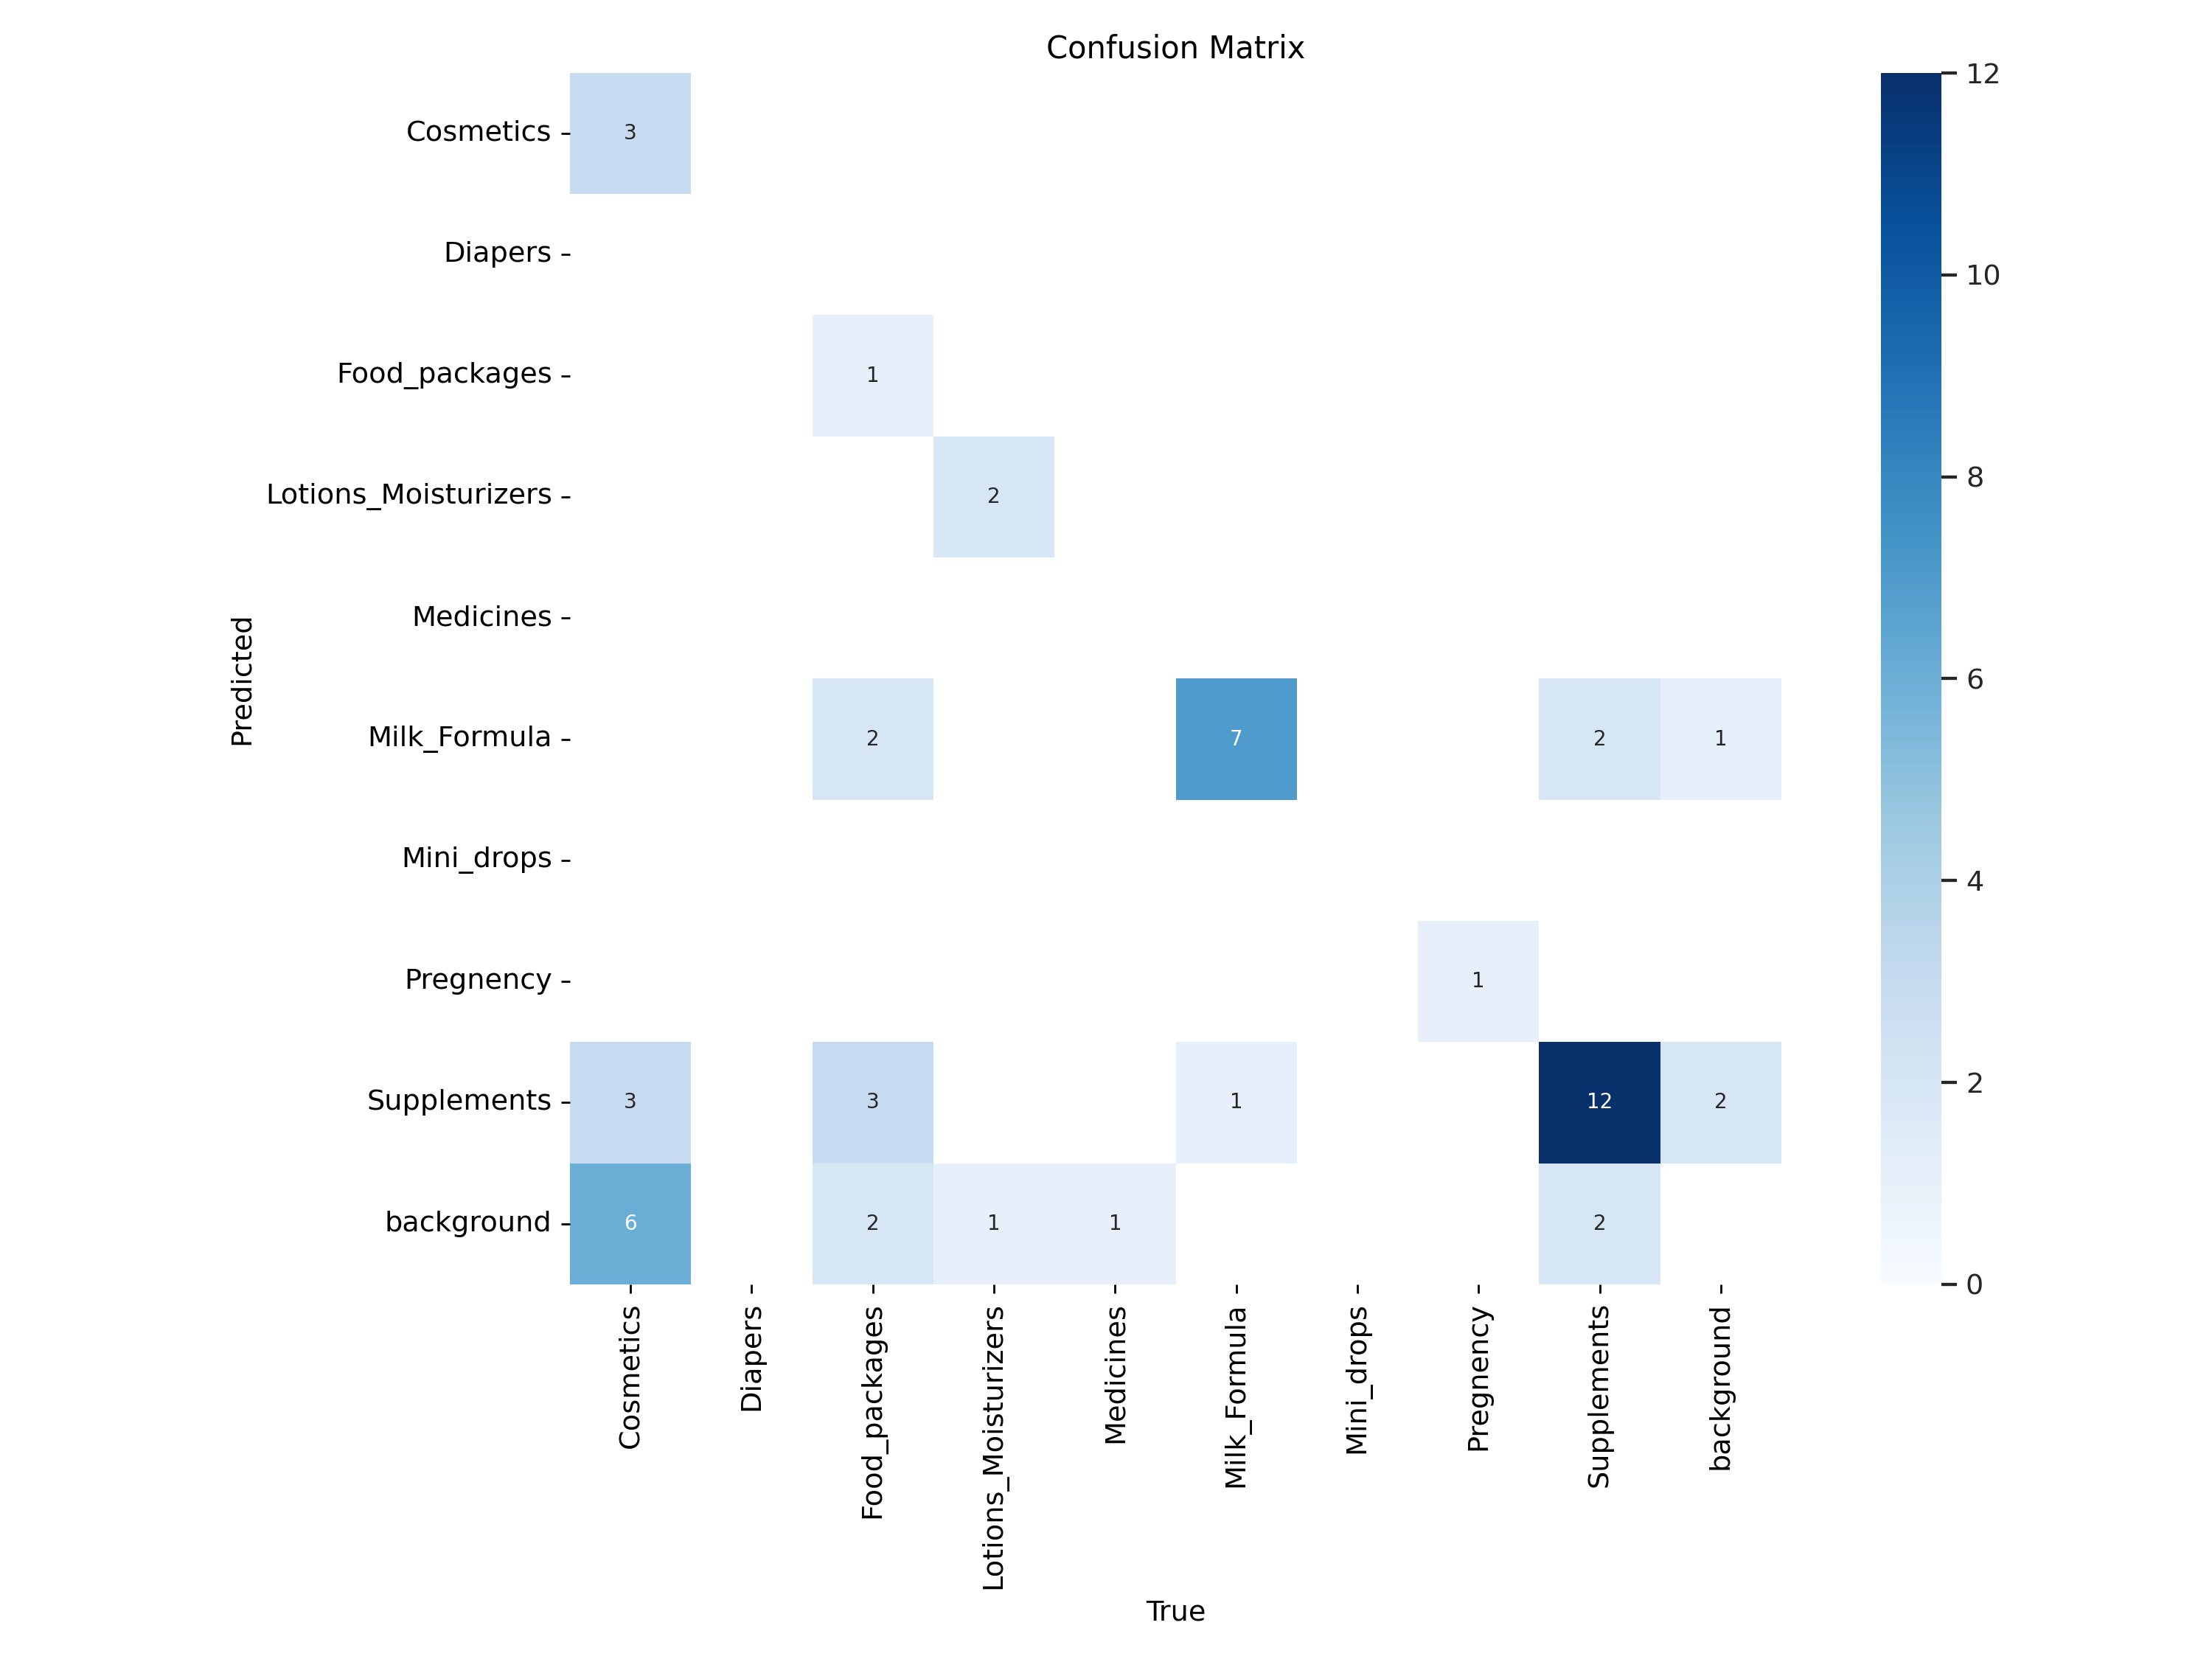

In [8]:
Image(filename=f"/content/runs/detect/train/confusion_matrix.png")

**Observation**
  - As observed, the model demonstrates precise predictions for the supplement class and Milk_Formula. This accuracy can be attributed to the abundance of such product types during the annotation phase.

#### Traning results of our model

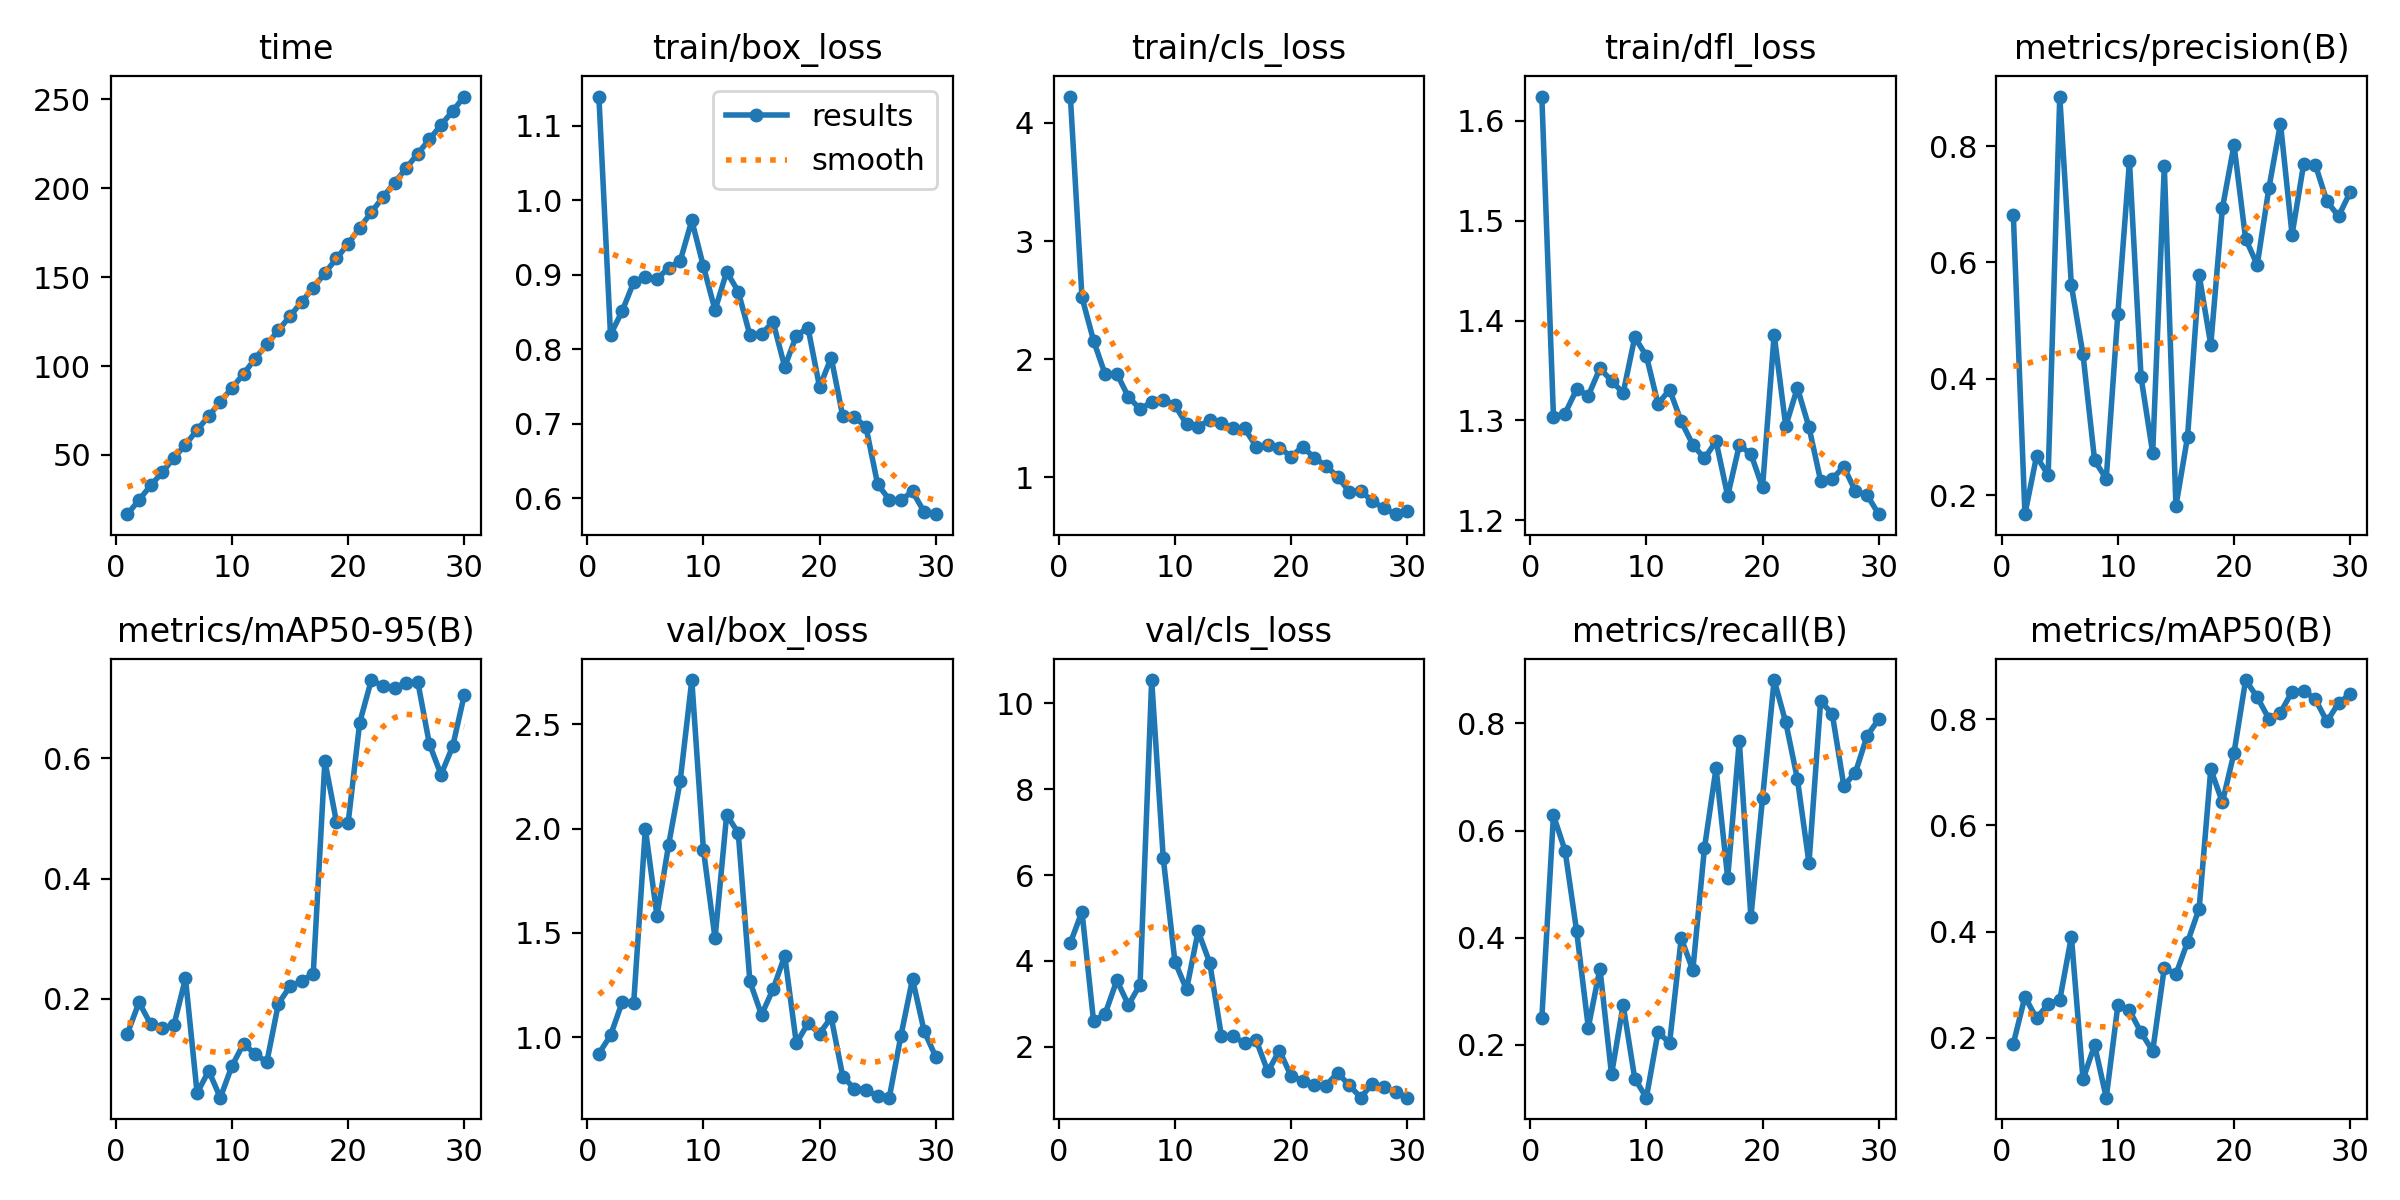

In [9]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

**Observation**
  - X-axis: The x-axis in each plot represents the number of epochs

  - Y-axis Interpretation for Each Plot:
     - <u>Time</u>: The time taken for each epoch (cumulative), indicating training duration.
       - We can see that the training time is linear which mean it took the same amount of time to train each epochs
     - <u>Train/box_loss</u>: Box regression loss during training, which measures how well the predicted bounding boxes fit the ground truth boxes.
       - We can see that the Trian/box_loss is decreasing this indicates that the predicted bounding boxes are fitting the ground truth boxes more accurately as the number of epochs increases
     - <u>Train/cls_loss</u>: Classification loss during training, which measures how well the model predicts the correct class labels for detected objects.
       - From the graph it is visible that the classification loss is decreasing indicating that the model correctly predictes the class of the image as number of epochs increases.
     - <u>Train/dfl_loss</u>: Distribution Focal Loss (DFL), which is used in YOLO models to improve bounding box accuracy.
        - As the number of epochs increases the DFL decreases which shows that the bounding box accuracy increases as epoch increases
     - <u>Metrics/precision(B)</u>: Precision of the model (how many predicted positives were correct), measured on the validation set.
        - The precision was increasing as the number of epochs increased showing that the model was improving.
     - <u>Metrics/recall(B)</u>: Recall of the model (how many actual positives were predicted), measured on the validation set.
        - The recall was increasing as the number of epochs increased showing that the model was predicting more actual positives as the number of epochs increased.
     - <u>Metrics/mAP50(B)</u>: Mean Average Precision at IoU threshold of 0.5, used to evaluate detection accuracy. Higher values indicate better performance.
        - Upon completing the 30 epochs of training, the mAP50(B) surpassed 0.8, indicating improved performance of the model compared to its initial stages of training.
     - <u>Metrics/mAP50-95(B)</u>: Mean Average Precision across IoU thresholds from 0.5 to 0.95, showing the overall detection accuracy across different bounding box overlaps.
        - This metric was also increasing as the number of epochs incresed showing that the model was improving as the number of epochs increased.
     - <u>Val/box_loss</u>: Validation box loss, measuring how well the model generalizes to unseen data.
     - <u>Val/cls_loss</u>: Validation classification loss, indicating how well the model classifies objects in validation data.
        * Both the Val/box_loss and Val/cls_loss was decreasing indicating that the model can generalize better to unseen data
        
**Trend Observations**:
  - Loss metrics generally decrease over time, suggesting that the model is learning and improving.
  - Precision, recall, and mAP metrics show fluctuating but upward trends, which indicates improving performance with each epoch.

#### Validating our model

In [10]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.11 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11m summary (fused): 303 layers, 20,036,971 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /content/MedData-Identifier-1/valid/labels.cache... 48 images, 1 backgrounds, 0 corrupt: 100% 48/48 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.08s/it]
                   all         48         49      0.596      0.802      0.841      0.731
             Cosmetics         12         12      0.627      0.702       0.71      0.536
         Food_packages          7          8          1      0.247      0.725      0.631
  Lotions_Moisturizers          3          3      0.738      0.667      0.715      0.555
             Medicines          1          1       0.38          1      0.995      0.995
          Milk_Formula          8          8      0.495          1      0.903      0.822
             Pregnency          1          1

**Performance Metrics**
  - Box (P): Precision = 0.596 (59.6%)
  - R (Recall): Recall = 0.802 (80.2%)
  - mAP50: Mean Average Precision at IoU threshold of 0.5 = 0.841 (84.1%)
  - mAP50-95: Mean Average Precision across IoU thresholds from 0.5 to 0.95 = 0.731 (73.1%)

**Observations:**
  - Overall Performance: The model achieves solid performance with a good mAP50 score of 84.1% and an mAP50-95 score of 73.1%, indicating that it performs well in detecting objects across a variety of IoU thresholds.

**Class-wise Performance:**
  - Best Class: "Medicines", "Pregnency", "Milk_Formula", "Supplements" have perfect recall (1.0), meaning all instances of these classes were detected.
**Challenges**: 
  - The "Food_packages" class has perfect precision (1.0) but relatively low recall (0.247), suggesting that while predictions were correct, many instances were missed.

### Predicting using model on unseen test dataset

In [2]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images

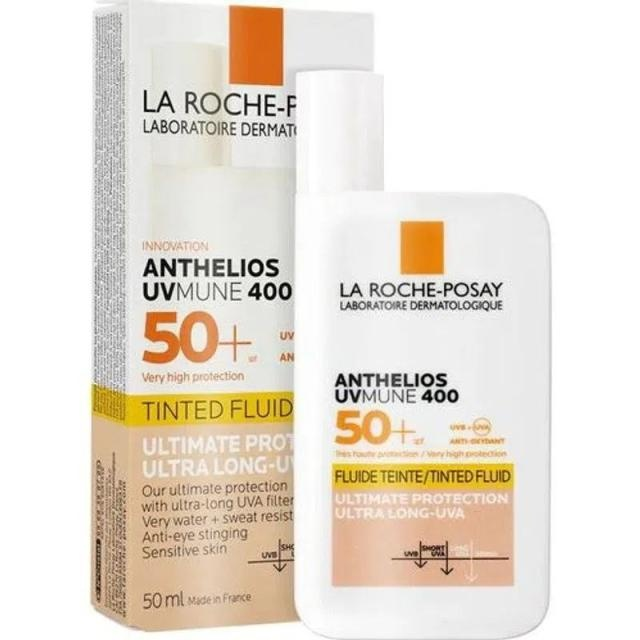

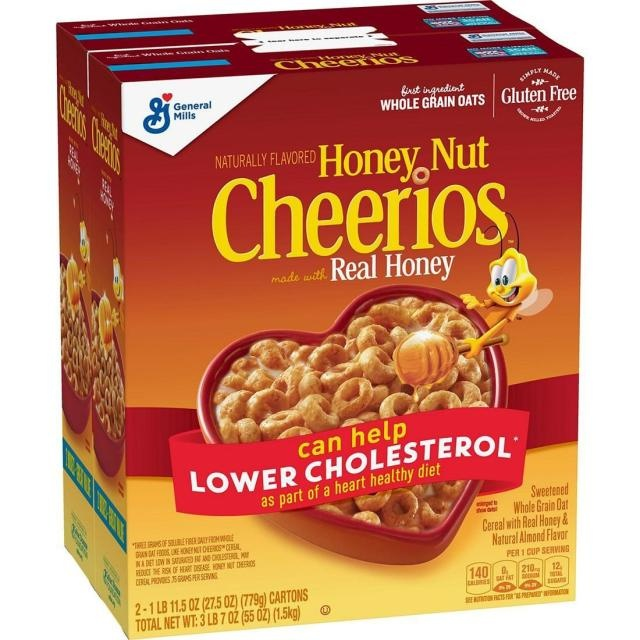

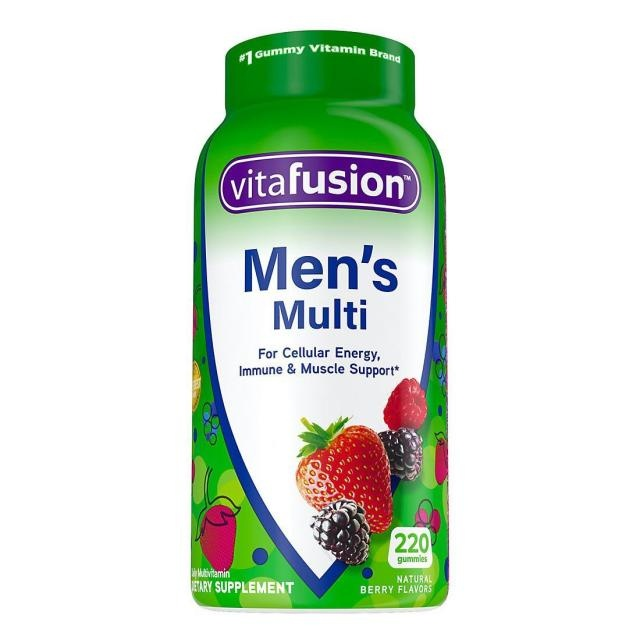

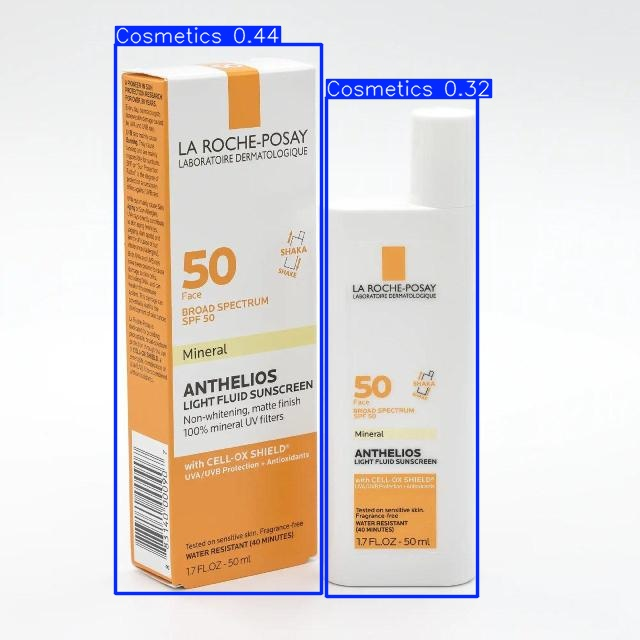

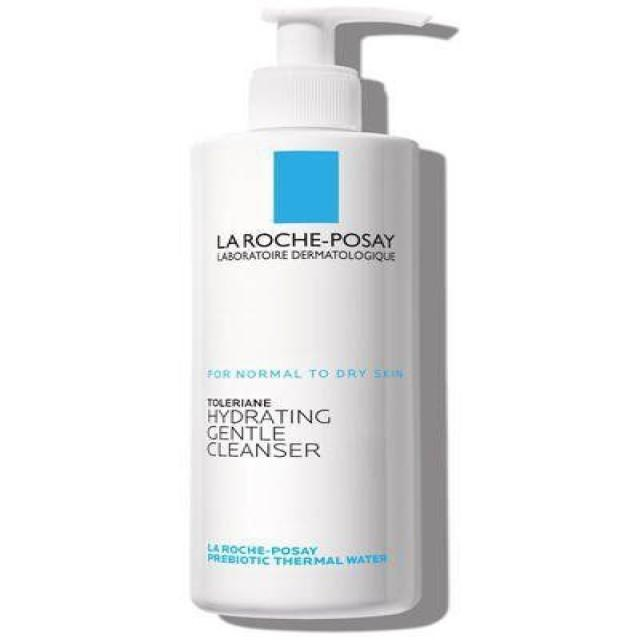

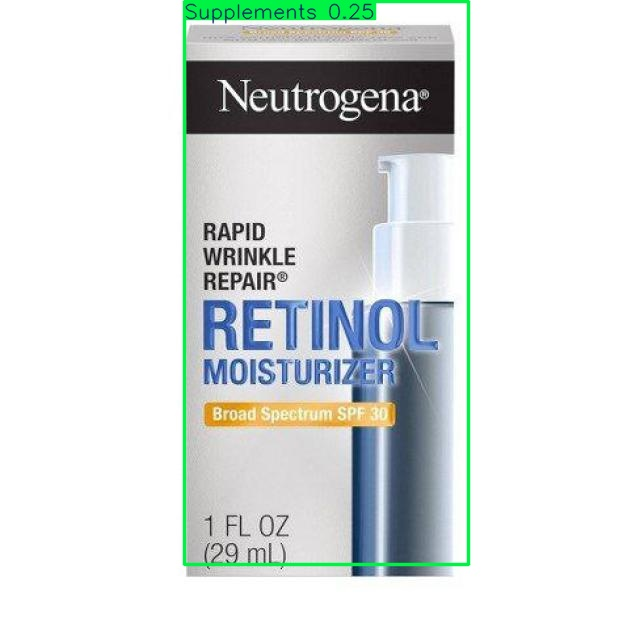

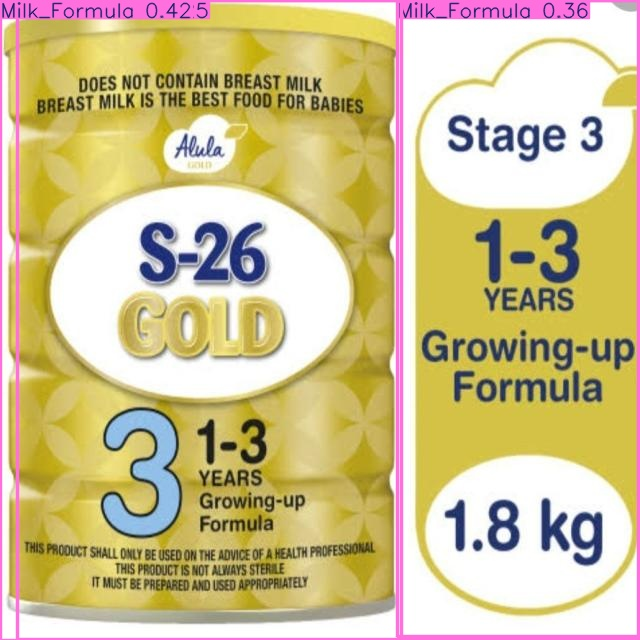

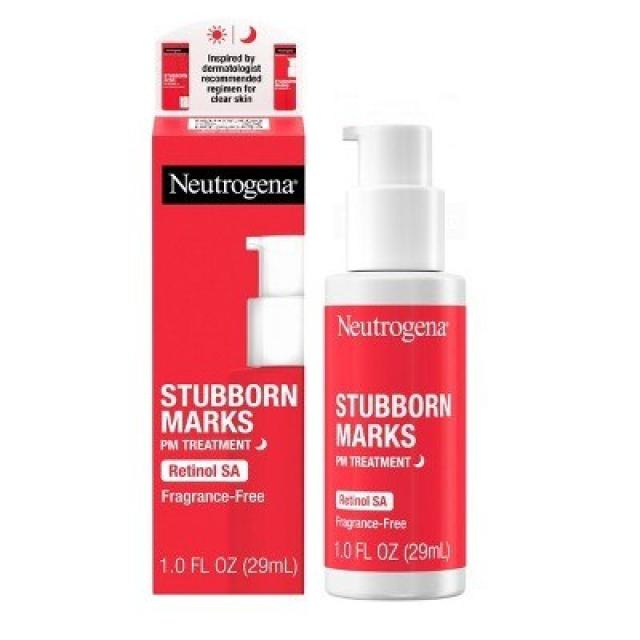

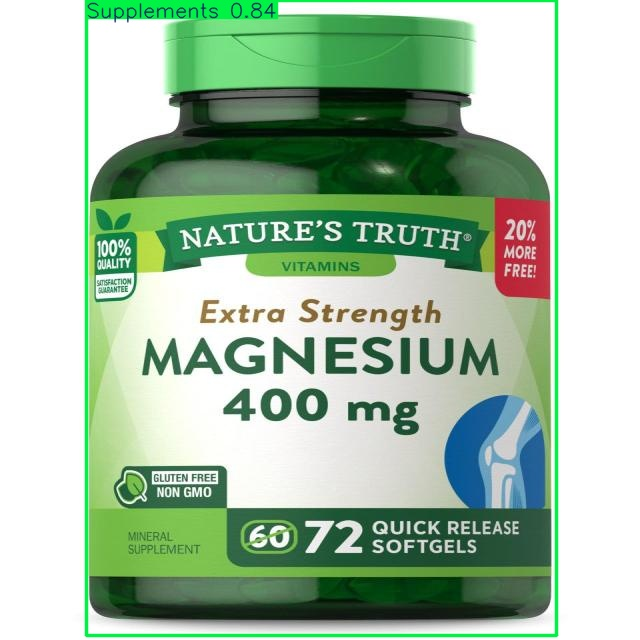

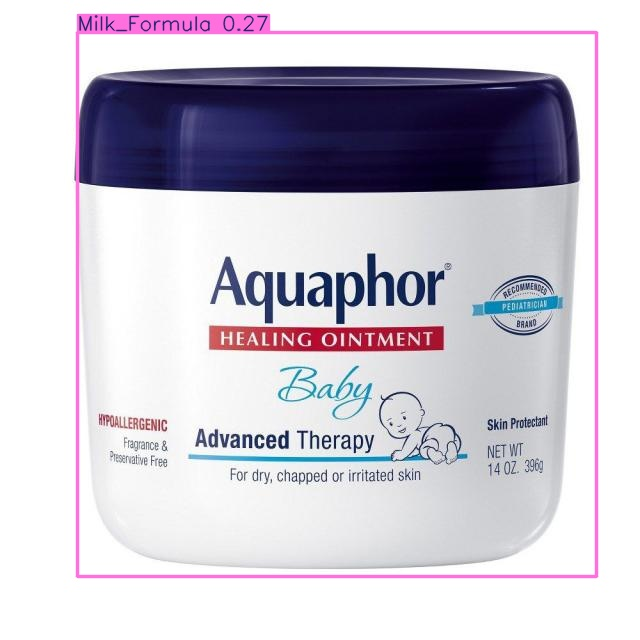

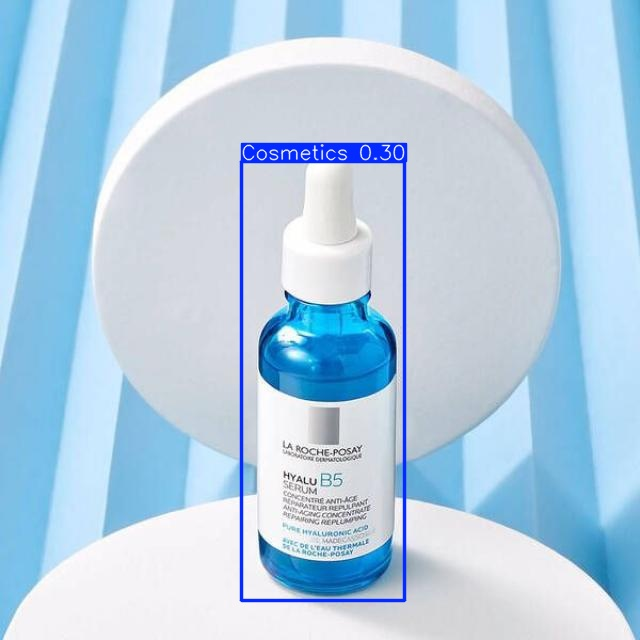

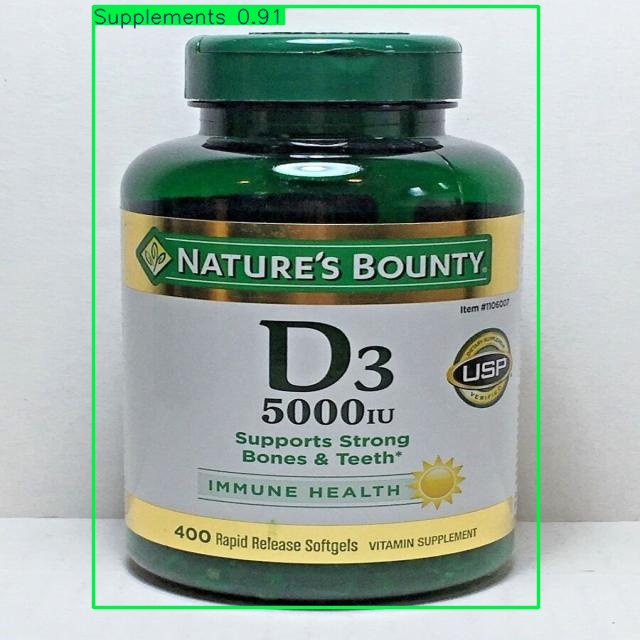

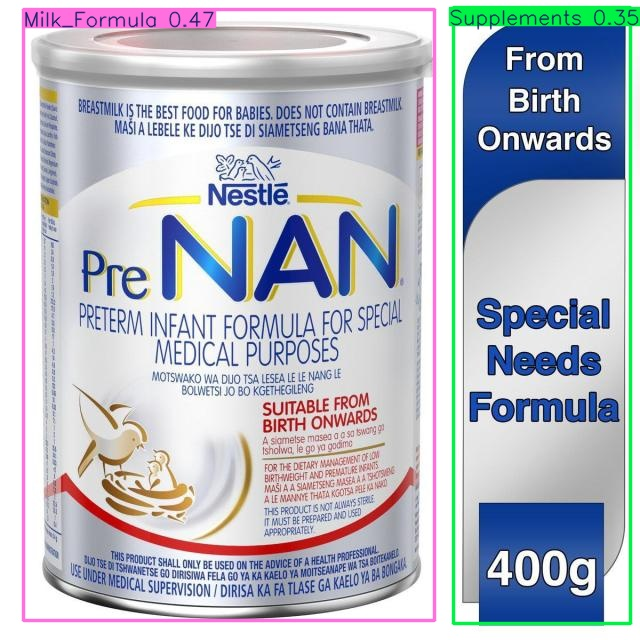

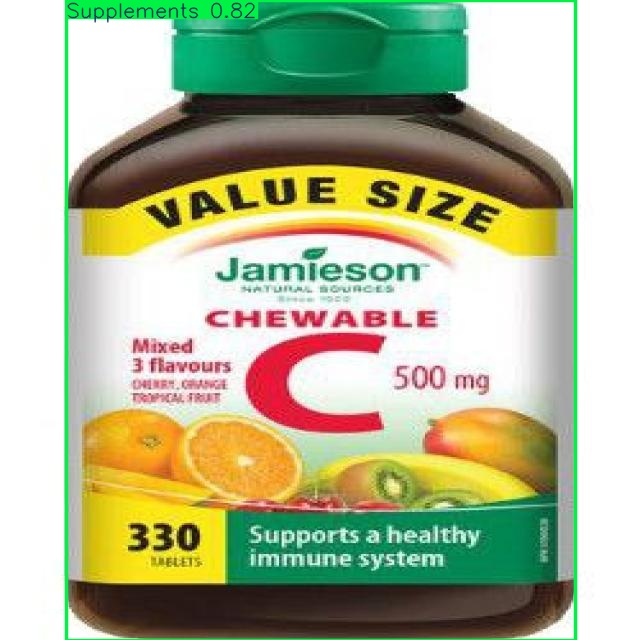

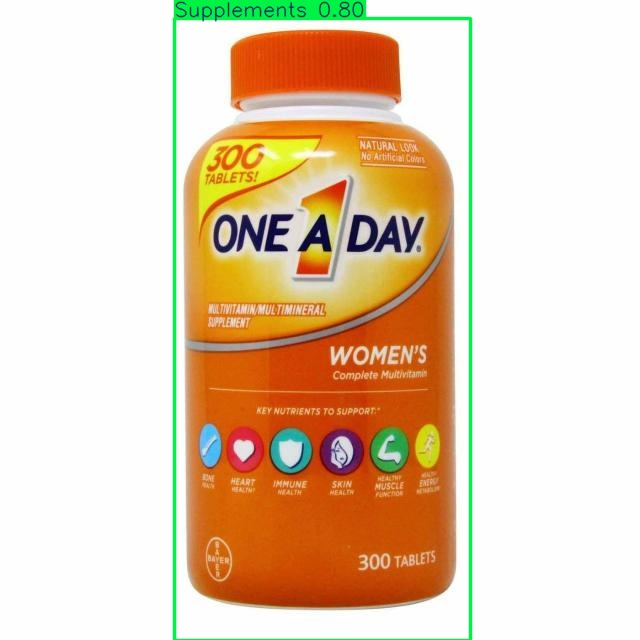

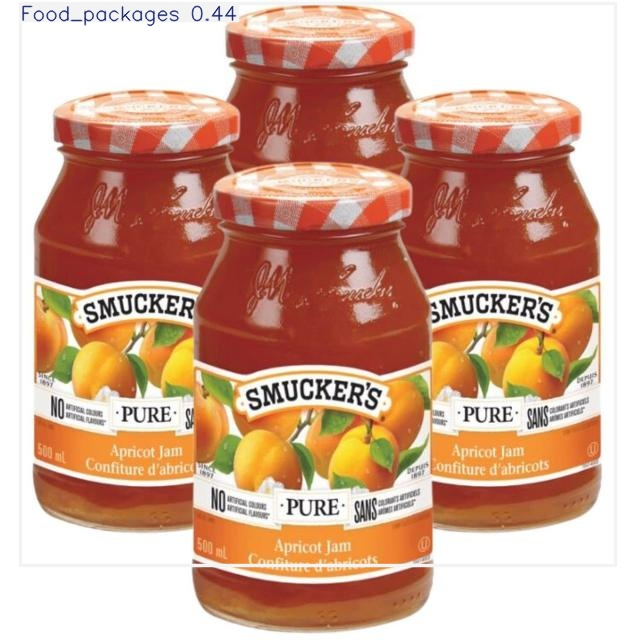

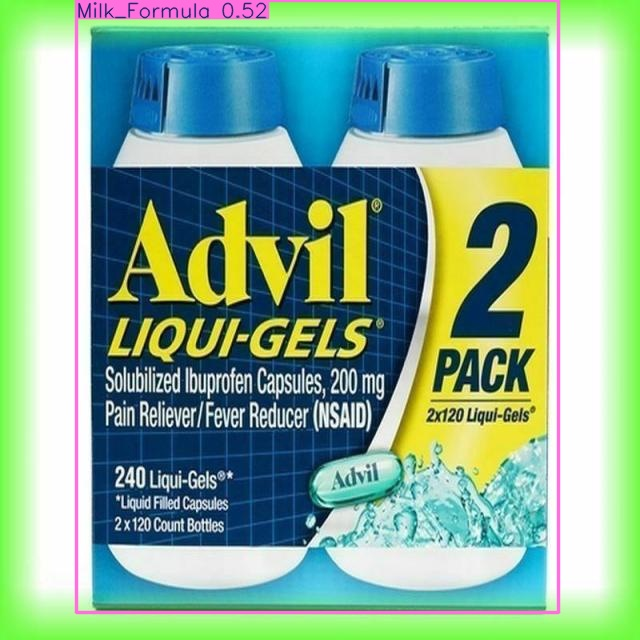

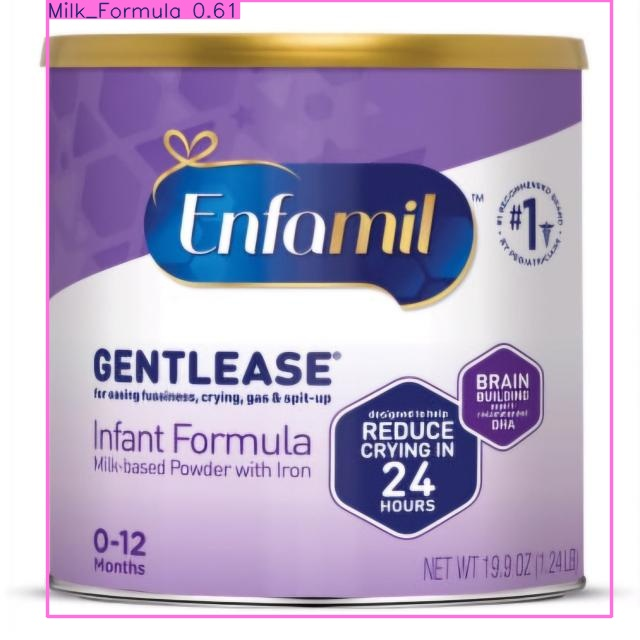

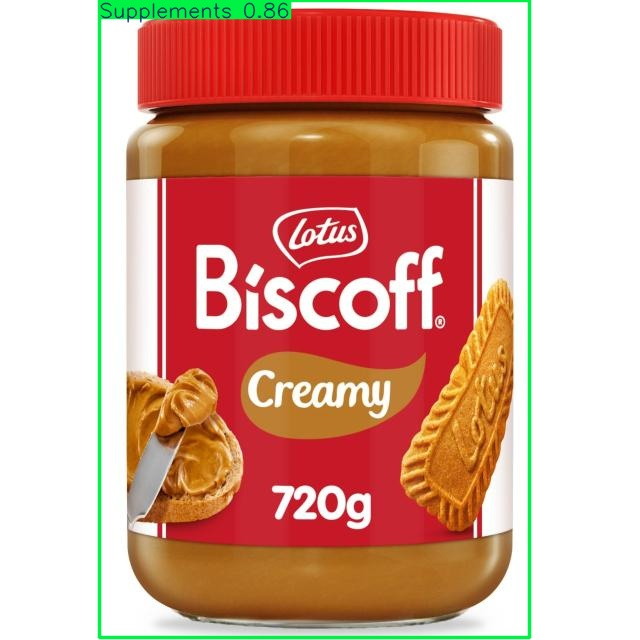

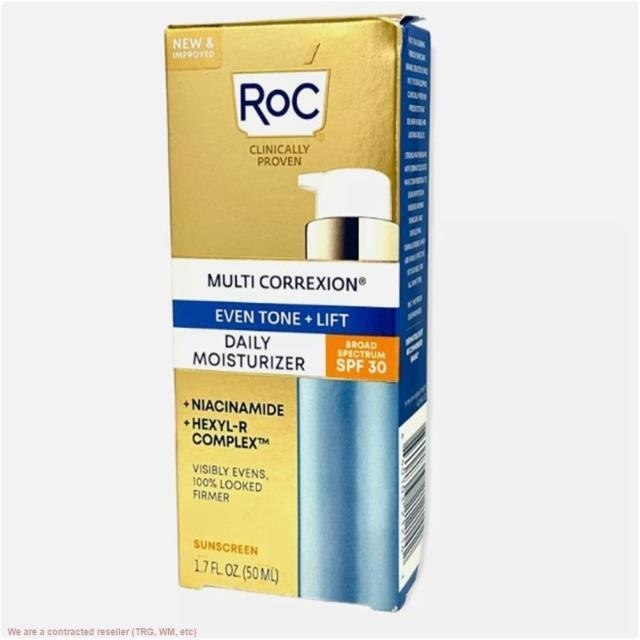

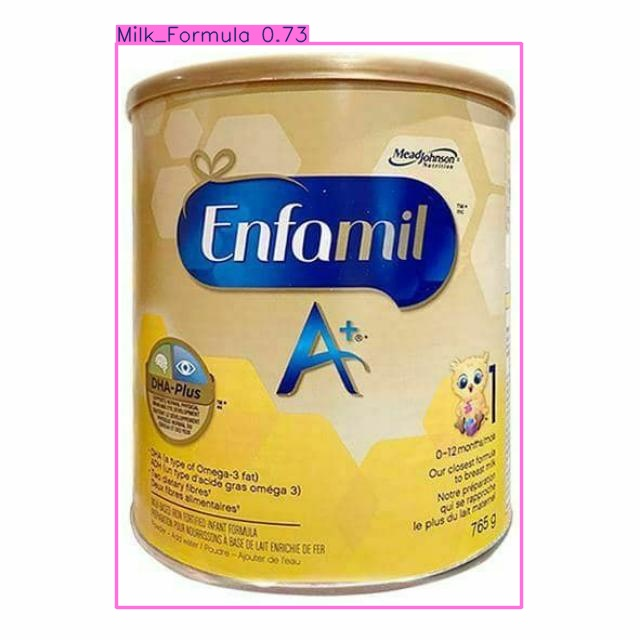

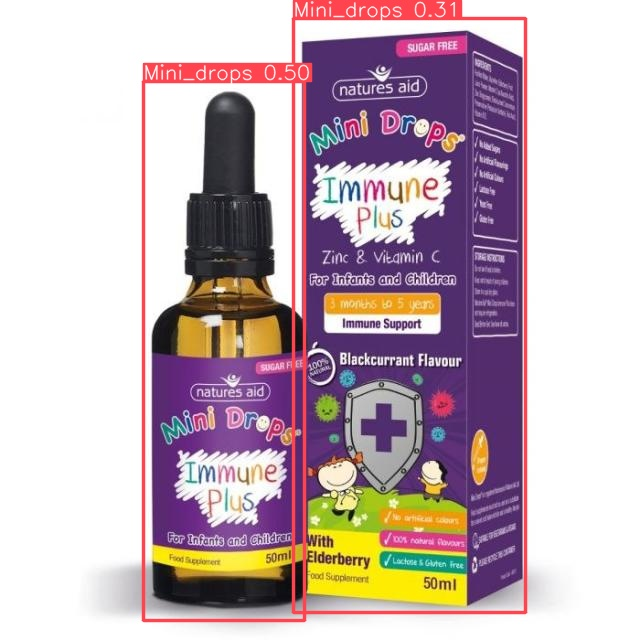

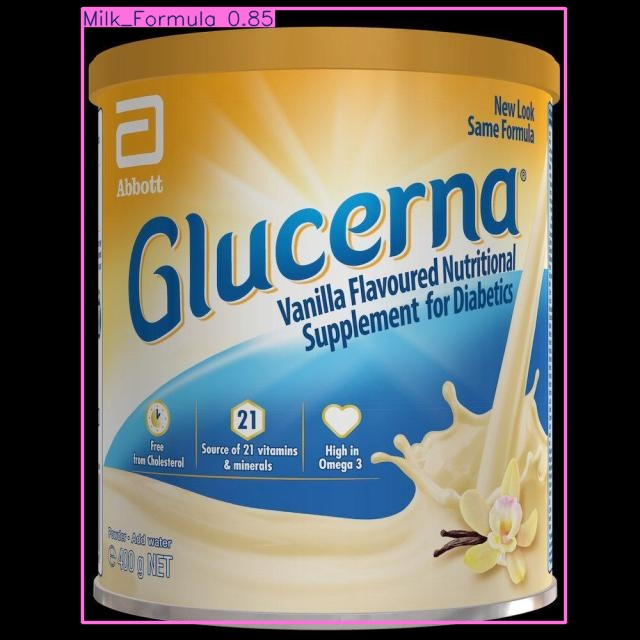

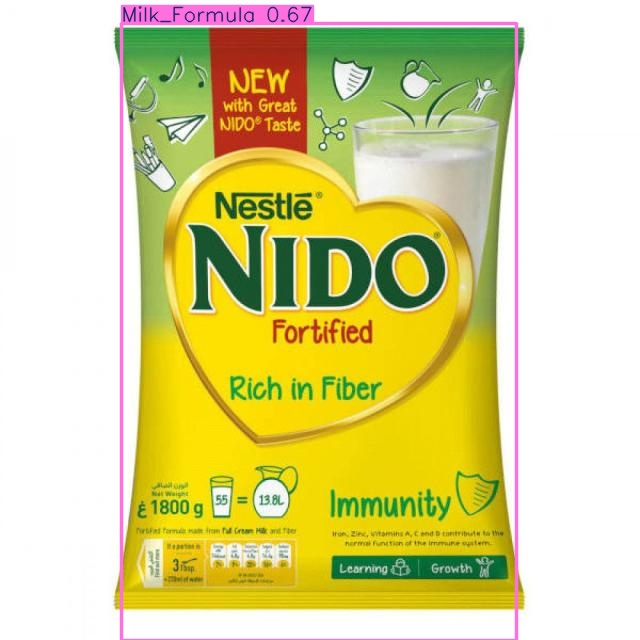

In [14]:
for imPath in glob.glob('/content/runs/detect/predict/*.jpg'):
  display.display(Image(filename=imPath, height=600))
  print('\n')

**Observation from testing the data**
- As we can see Milk_formula and supplements were accurately predicted with some wrong predictions

In [16]:
# Saving model weight to google drive
import shutil

source_folder = '/content/runs'
destination_folder = '/content/drive/My Drive/YOLO-Runs/'

shutil.copytree(source_folder, destination_folder)

'/content/drive/My Drive/YOLO-Runs/'

#### Extracting relevant data from the detection results 

In [17]:
image_folder = '/content/drive/My Drive/Photos_for_YOLO'
data_fraction = os.listdir(image_folder)[:5]

In [3]:
model = YOLO(f'/content/runs/detect/train/weights/best.pt')
for img_name in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_name)

    results = model(img_path)
    boxes = results[0].boxes

    if boxes is not None:
        bboxes = boxes.xyxy
        confidences = boxes.conf
        class_ids = boxes.cls

    class_labels = [results[0].names[int(cls)] for cls in class_ids]

    detections_list = []
    if boxes is not None:
        for i in range(len(bboxes)):
            detection = {
                'Image': img_name,
                'xmin': bboxes[i][0].item(),
                'ymin': bboxes[i][1].item(),
                'xmax': bboxes[i][2].item(),
                'ymax': bboxes[i][3].item(),
                'confidence': confidences[i].item(),
                'class': class_labels[i]
            }
            detections_list.append(detection)

        detections_df = pd.DataFrame(detections_list)

        csv_file = 'detection_results.csv'

        if not os.path.isfile(csv_file):
            detections_df.to_csv(csv_file, index=False)
        else:
            detections_df.to_csv(csv_file, mode='a', header=False, index=False)

In [69]:
# Downloading the result
from google.colab import files

files.download('/content/detection_results/detection_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>